<a href="https://colab.research.google.com/github/keshavnani/Time-series-analysis-with-crypto-currency/blob/main/WebScraping_CryptoCurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# The List of 20 type of cryptocurrency symbols
coin_list = ['BTC', 'ETH', 'XRP', 'ADA', 'USDT', 'DOGE', 'XLM', 'DOT', 'UNI', 'LINK', 'USDC', 'BCH', 'LTC', 'GRT', 'ETC', 'FIL', 'AAVE', 'ALGO', 'EOS']

# Define the date range for the simulated data (e.g., last 30 days of daily data)
end_date = datetime.now()
start_date = end_date - timedelta(days=1440)

# Initialize an empty DataFrame to store all simulated cryptocurrency data
main_df = pd.DataFrame()

print("Generating simulated cryptocurrency data...")

# Generate data for each coin
for coin_symbol in coin_list:
    # Generate a date range for the current coin
    dates = pd.date_range(start=start_date, end=end_date, freq='D')

    # Simulate Open, High, Low, Close prices
    # Base price depends on the length of the symbol for some variation
    base_price = (len(coin_symbol) * 1000.0) + np.random.uniform(50, 200)

    # Generate random walk-like prices
    open_prices = base_price + np.cumsum(np.random.normal(0, 10, len(dates)))
    close_prices = open_prices + np.random.normal(0, 5, len(dates))
    high_prices = np.maximum(open_prices, close_prices) + np.abs(np.random.normal(0, 3, len(dates)))
    low_prices = np.minimum(open_prices, close_prices) - np.abs(np.random.normal(0, 3, len(dates)))

    # Create a DataFrame for the current coin
    df_coin = pd.DataFrame({
        'Datetime': dates,
        'Open': open_prices,
        'High': high_prices,
        'Low': low_prices,
        'Close': close_prices,
        'Symbol': coin_symbol
    })

    # Concatenate to the main DataFrame
    main_df = pd.concat([main_df, df_coin], ignore_index=True)
    print(f"Generated simulated data for {coin_symbol}.")

print("\n--- Simulated Data Generation Complete ---")
if not main_df.empty:
    print(f"Total entries in main_df: {len(main_df)}")
    print("Main DataFrame Head (Simulated Data):")
    display(main_df.head())
    print("\nMain DataFrame Info (Simulated Data):")
    main_df.info()
else:
    print("main_df is empty, simulated data generation failed.")

Generating simulated cryptocurrency data...
Generated simulated data for BTC.
Generated simulated data for ETH.
Generated simulated data for XRP.
Generated simulated data for ADA.
Generated simulated data for USDT.
Generated simulated data for DOGE.
Generated simulated data for XLM.
Generated simulated data for DOT.
Generated simulated data for UNI.
Generated simulated data for LINK.
Generated simulated data for USDC.
Generated simulated data for BCH.
Generated simulated data for LTC.
Generated simulated data for GRT.
Generated simulated data for ETC.
Generated simulated data for FIL.
Generated simulated data for AAVE.
Generated simulated data for ALGO.
Generated simulated data for EOS.

--- Simulated Data Generation Complete ---
Total entries in main_df: 27379
Main DataFrame Head (Simulated Data):


,Datetime,Open,High,Low,Close,Symbol
0,2021-12-12 13:28:31.433982,3176.098136,3178.923617,3173.936423,3177.734552,BTC
1,2021-12-13 13:28:31.433982,3161.557439,3164.587877,3159.395503,3163.603578,BTC
2,2021-12-14 13:28:31.433982,3169.382836,3170.588497,3163.326055,3170.249974,BTC
3,2021-12-15 13:28:31.433982,3174.014749,3176.402526,3170.999140,3174.959867,BTC
4,2021-12-16 13:28:31.433982,3171.290379,3172.257790,3160.238896,3164.957622,BTC



Main DataFrame Info (Simulated Data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  27379 non-null  datetime64[ns]
 1   Open      27379 non-null  float64       
 2   High      27379 non-null  float64       
 3   Low       27379 non-null  float64       
 4   Close     27379 non-null  float64       
 5   Symbol    27379 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.3+ MB


In [ ]:
main_df = main_df[['Datetime', 'Symbol', 'Open', 'High', 'Low', 'Close']].reset_index(drop=True)
main_df

,Datetime,Symbol,Open,High,Low,Close
0,2021-12-12 13:28:31.433982,BTC,3176.098136,3178.923617,3173.936423,3177.734552
1,2021-12-13 13:28:31.433982,BTC,3161.557439,3164.587877,3159.395503,3163.603578
2,2021-12-14 13:28:31.433982,BTC,3169.382836,3170.588497,3163.326055,3170.249974
3,2021-12-15 13:28:31.433982,BTC,3174.014749,3176.402526,3170.999140,3174.959867
4,2021-12-16 13:28:31.433982,BTC,3171.290379,3172.257790,3160.238896,3164.957622
...,...,...,...,...,...,...
27374,2025-11-17 13:28:31.433982,EOS,3388.427056,3395.630063,3386.893760,3392.974278
27375,2025-11-18 13:28:31.433982,EOS,3373.992358,3381.073405,3372.884381,3379.945736
27376,2025-11-19 13:28:31.433982,EOS,3360.570077,3365.265719,3348.118253,3349.886008
27377,2025-11-20 13:28:31.433982,EOS,3364.700163,3372.573281,3364.594148,3370.564969


In [ ]:
main_df.to_csv('main_df.csv', index=False)

In [ ]:
%pip install plotly
%pip install pyspark
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install pandas_datareader
%pip install plotly

In [ ]:
#importing libraries
import os
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import plotly.express as px
import matplotlib.pyplot as plt


#for bold
start='\033[1m'
end='\033[0;0m'

In [ ]:
df=pd.read_csv('main_df.csv')

In [ ]:
df['Datetime']=pd.to_datetime(df['Datetime']).dt.date

In [ ]:
df.tail(10)

,Datetime,Symbol,Open,High,Low,Close
27369,2025-11-12,EOS,3421.910779,3422.708131,3409.190337,3411.350509
27370,2025-11-13,EOS,3417.308970,3418.557949,3410.681156,3413.870544
27371,2025-11-14,EOS,3404.032482,3415.841790,3401.272569,3413.683883
27372,2025-11-15,EOS,3403.240812,3412.352042,3397.503894,3411.940381
27373,2025-11-16,EOS,3391.659709,3400.465809,3391.166753,3395.460622
27374,2025-11-17,EOS,3388.427056,3395.630063,3386.893760,3392.974278
27375,2025-11-18,EOS,3373.992358,3381.073405,3372.884381,3379.945736
27376,2025-11-19,EOS,3360.570077,3365.265719,3348.118253,3349.886008
27377,2025-11-20,EOS,3364.700163,3372.573281,3364.594148,3370.564969
27378,2025-11-21,EOS,3377.055588,3382.292055,3376.740792,3376.848753


In [ ]:
spark = SparkSession.builder.appName('CheckPyspark').master("local").getOrCreate()

In [ ]:
sparkDF=spark.createDataFrame(df)

In [ ]:
sparkDF.createOrReplaceTempView("crypto")

In [ ]:
dfBTC = spark.sql(" select * from crypto where Symbol='BTC' ")

In [ ]:
dfBTC.show()

+----------+------+------------------+------------------+------------------+------------------+
|  Datetime|Symbol|              Open|              High|               Low|             Close|
+----------+------+------------------+------------------+------------------+------------------+
|2021-12-12|   BTC|3176.0981360213527| 3178.923616893163| 3173.936423426607|3177.7345517284875|
|2021-12-13|   BTC| 3161.557438518117|3164.5878771725443| 3159.395502568405| 3163.603578379926|
|2021-12-14|   BTC| 3169.382836027528|3170.5884965654777| 3163.326055292206|3170.2499739564896|
|2021-12-15|   BTC|3174.0147493975146|3176.4025264588827| 3170.999139623573|3174.9598670007467|
|2021-12-16|   BTC|3171.2903787014584|3172.2577897155925|  3160.23889636222| 3164.957622343601|
|2021-12-17|   BTC|3159.9964411406054| 3163.140904998053| 3155.233063936292|3155.8739868563152|
|2021-12-18|   BTC|3169.7667392782623| 3170.499967927027|3167.3912417991933|  3169.00526433804|
|2021-12-19|   BTC| 3158.060595352996| 3

In [ ]:
dfETH = spark.sql(" select * from crypto where Symbol='ETH' ")

In [ ]:
dfETH .show()

+----------+------+------------------+------------------+------------------+------------------+
|  Datetime|Symbol|              Open|              High|               Low|             Close|
+----------+------+------------------+------------------+------------------+------------------+
|2021-12-12|   ETH| 3162.637948349798|3165.7693883559696|3159.8873631147685|3164.5485115729507|
|2021-12-13|   ETH|3152.5084258723828| 3153.022699576777| 3152.016347247155| 3152.733288033788|
|2021-12-14|   ETH| 3144.374387432938| 3153.173259729947| 3143.949130531508| 3151.962488940904|
|2021-12-15|   ETH|3138.0498154487696|3144.5911391668865|3128.4122603230608| 3132.493653976775|
|2021-12-16|   ETH|3150.6571104744385|  3151.95949046287|3144.7566940866964|3145.5338959160267|
|2021-12-17|   ETH|3153.2684987186663|3154.4508253596177| 3148.336574729171|3148.9803462640266|
|2021-12-18|   ETH| 3139.671754393092|3142.8920471546667|3135.7614445897348|  3136.89507879166|
|2021-12-19|   ETH| 3124.418631459042|31

In [ ]:
pandasBTCDF = dfBTC.toPandas()
pandasETHDF = dfETH.toPandas()

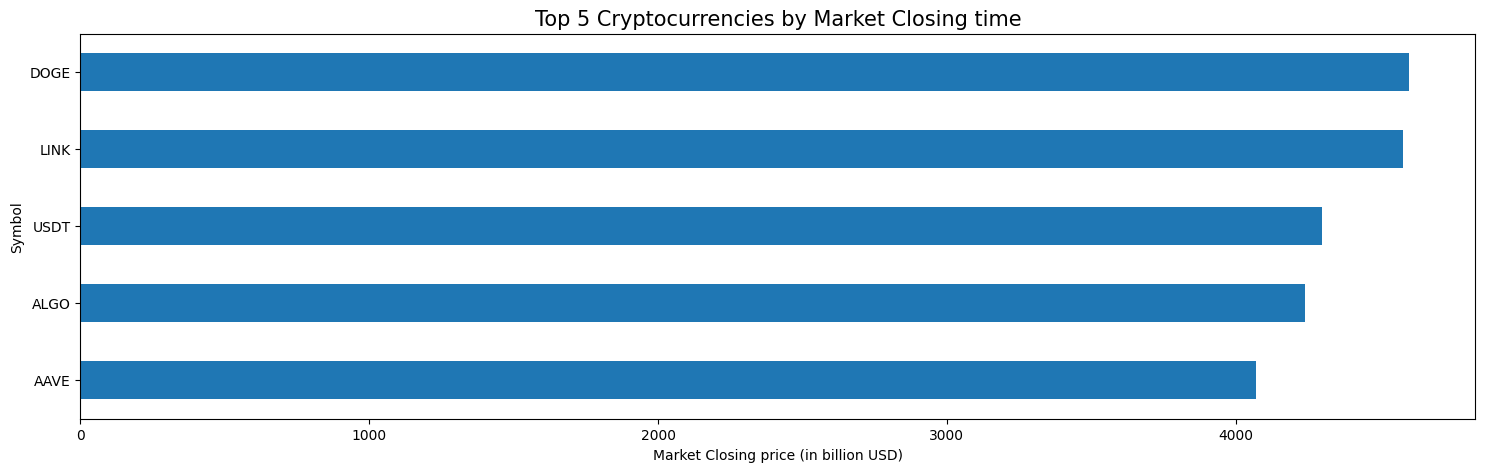

In [ ]:
plt.figure(figsize=(18,5))
ax = df.groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Closing price (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Closing time", fontsize=15)
plt.show()

In [ ]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['Close'].last().sort_values(ascending=False).head(4).index


data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]
top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]
top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]
top_4_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two_three)]

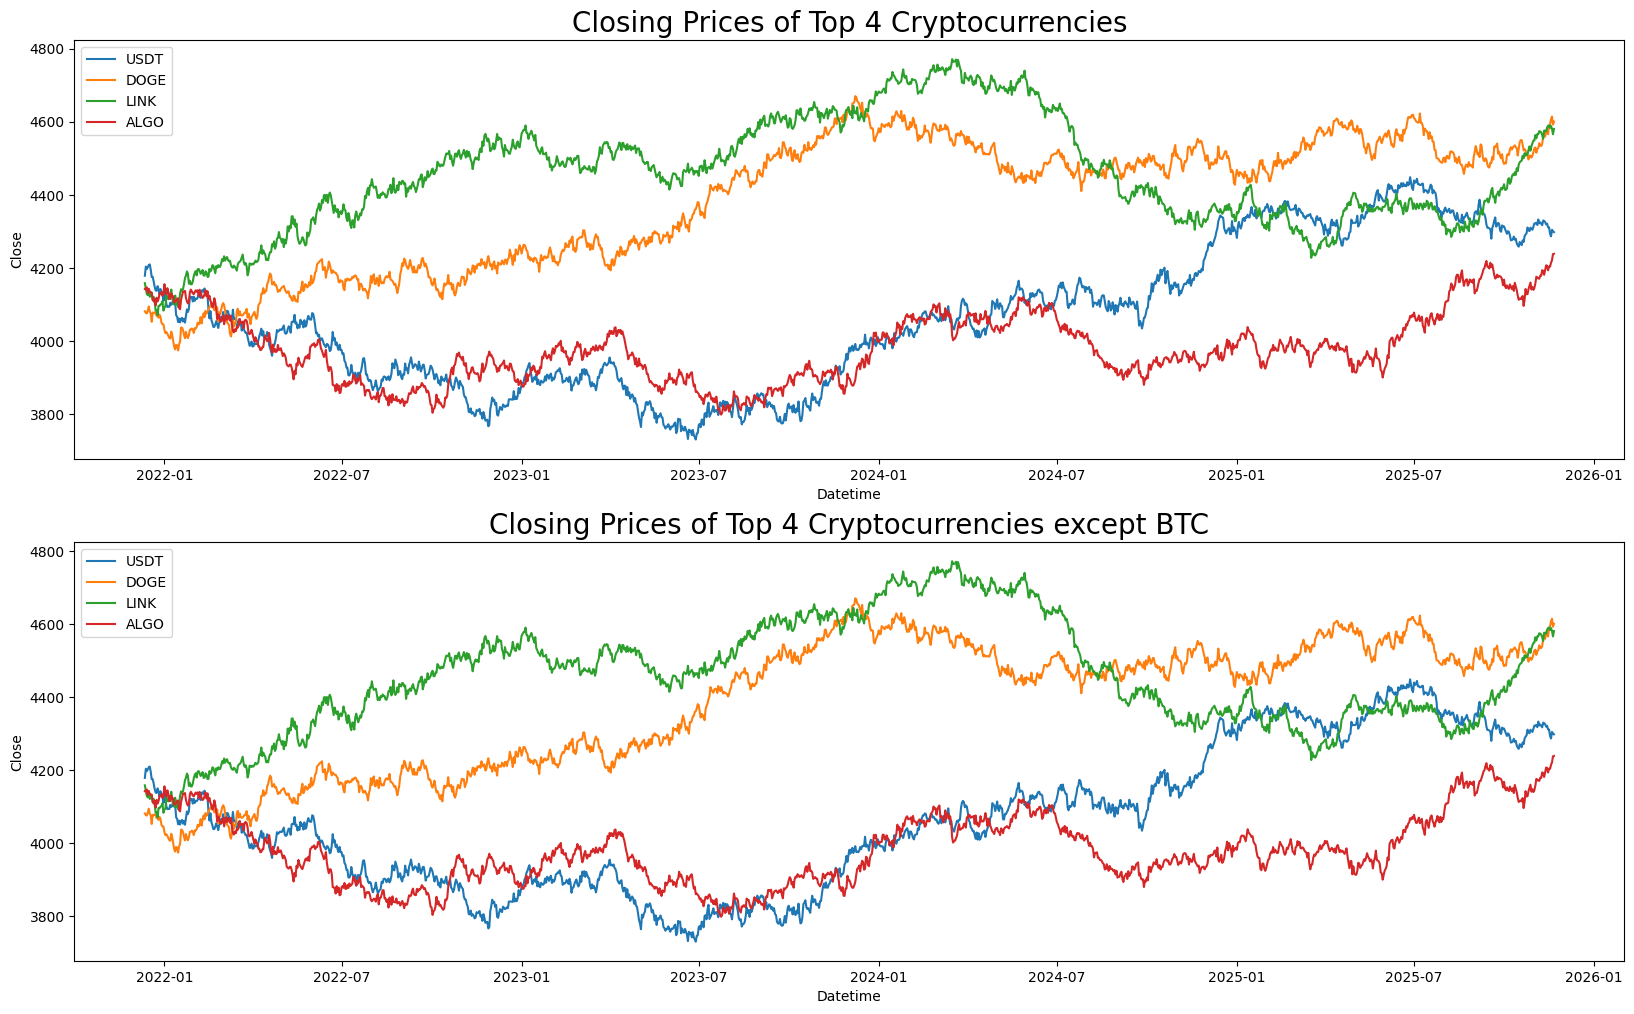

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data=data_top_4_currencies, x="Datetime", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Datetime", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

In [ ]:
# Ensure pandasETHDF is sorted by date and then take the last 30 entries (days)
df1_last30 = pandasETHDF.sort_values(by='Datetime').tail(30)

# Exclude 'Datetime' and 'Symbol' columns for numerical aggregations
# and include them for max/min operations to get the date range
numeric_cols = ['Open', 'High', 'Low', 'Close']

# Calculate mean for numerical columns
df1_average = df1_last30[numeric_cols].mean(axis=0)
print("Last 1440 days average price of Ethereum \n", df1_average)

print("\n\n")

# Calculate max values (including Datetime for latest date)
df1_ethmax = df1_last30.max()
print("Last 1440 days MAX price of Ethereum \n", df1_ethmax)

print("\n\n")

# Calculate min values (including Datetime for earliest date)
df1_ethmin = df1_last30.min()
print("Last 1440 days MIN price of Ethereum \n", df1_ethmin)

print("\n\n")

# Calculate standard deviation for numerical columns
stddf1 = df1_last30[numeric_cols].std(axis=0, skipna=True)
print("standard deviation\n", stddf1)

Last 1440 days average price of Ethereum 
 Open     3479.746443
High     3483.707245
Low      3474.846358
Close    3479.509975
dtype: float64



Last 1440 days MAX price of Ethereum 
 Datetime     2025-11-21
Symbol              ETH
Open        3515.864454
High        3517.869812
Low         3511.543058
Close       3516.011945
dtype: object



Last 1440 days MIN price of Ethereum 
 Datetime     2025-10-23
Symbol              ETH
Open        3427.439113
High        3432.413412
Low          3415.29977
Close       3420.077751
dtype: object



standard deviation
 Open     29.325212
High     28.489396
Low      29.402169
Close    29.160867
dtype: float64


In [ ]:
# Ensure pandasBTCDF is sorted by date and then take the last 30 entries (days)
df_last30 = pandasBTCDF.sort_values(by='Datetime').tail(30)

print("Correlation between Ethereum OPEN VS BITCOIN OPEN", df1_last30['Open'].corr(df_last30['Open']))
print("Correlation between Ethereum CLOSE VS BITCOIN CLOSE", df1_last30['Close'].corr(df_last30['Close']))

Correlation between Ethereum OPEN VS BITCOIN OPEN -0.3096150282100762
Correlation between Ethereum CLOSE VS BITCOIN CLOSE -0.29399656786934025


Text(0, 0.5, 'ETH axis')

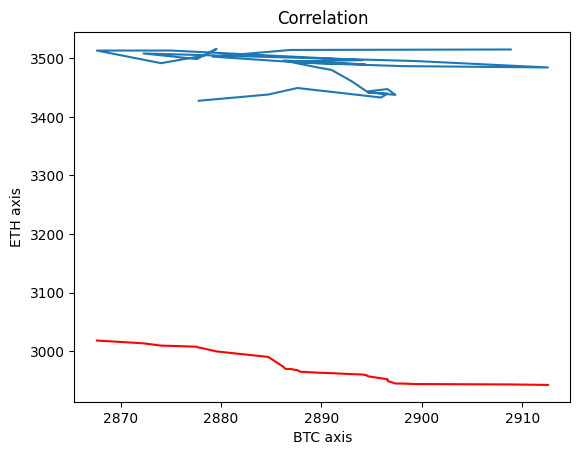

In [ ]:
# adds the title
plt.title('Correlation')

# plot the data
plt.plot(df_last30['Open'],df1_last30['Open'])

# fits the best fitting line to the data
plt.plot(np.unique(df_last30['Open']),
		np.poly1d(np.polyfit(df_last30['Open'], df1_last30['Open'], 1))
		(np.unique(df1_last30['Open'])), color='red')

# Labelling axes
plt.xlabel('BTC axis')
plt.ylabel('ETH axis')

plotting the heatmap for correlation


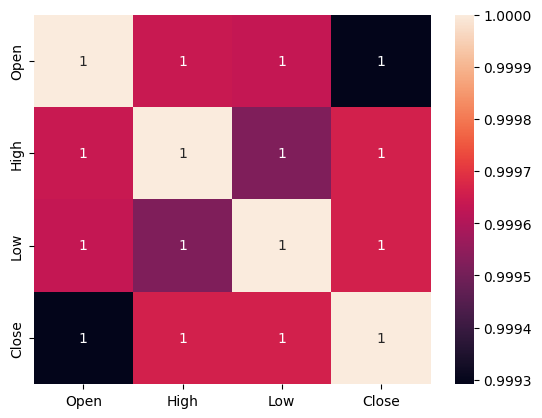

In [ ]:
import seaborn as sns

# checking correlation using heatmap
#Loading dataset
#flights = sns.load_dataset("pandasETHDF")

print("plotting the heatmap for correlation")
# Select only the numerical columns before calculating correlation
ax = sns.heatmap(pandasETHDF[['Open', 'High', 'Low', 'Close']].corr(), annot=True)